# Non-Parametric Statistics
Charlie Edelson

Statistics Seminar

March 23, 2017



# Overview
* What are non-parametric statistics?

* Familiar Examples

* Why to use non-parametric statistics

* Commom Tests
    - Spearman's rank correlation
    - Mann-Whitney U
    - Wilcoxon signed-rank test
    - Kruskal-Wallis

# What are Non-Parametric Statistics?
It's helpful to have a definition of *parametric statics*


# Parametric Statistics

* Statistics which assume fixed probability distribution
    - i.e. fixed number of parameters
* Most Common Statitics and Models
    - t-tests
    - ANOVA
    - Linear Regression


* All of the above assume *normality*
    - $\mu$, $\sigma$

# Non-Parametric Statistics
**Anything that isn't parametric!**

...

Okay maybe not

## Multiple Definitions

1. No distributional assumptions

<ol start="2">
    <li>No fixed structure
        <ul>
            <li> Variable number of parameters </li>
        </ul>
    </li>
</ol>

# Familiar Examples
Come across a few examples throughout the semester

In [1]:
import numpy
import seaborn
import warnings
from matplotlib import pyplot

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
class point(object):
    def __init__(self, y, x):
        self.y = y
        self.x = x
        self.dist = []

    def addDistance(self,p, d):
        self.dist.append((d,p))

def distance(p1, p2):
    d_square = sum( (a-b) for a,b in zip(p1.x, p2.x) )
    return d_square**.5

def to_points(y,x):
    return [ point(a,[b]) for a,b in numpy.column_stack((y,x)) ]

def from_points(ps):
    y = []
    x = []
    for p in ps:
        y.append(p.y)
        x.append(p.x)
        
    return numpy.array(y), numpy.array(x)

def k_nearest(points,k):
    new_points = []
    for p1 in points:
        for j, p2 in enumerate(points):
            p1.addDistance(p2,distance(p1,p2))
        
        p1.dist = sorted(p1.dist, key=lambda z: z[0])
        p_ks = [ p for d,p in p1.dist[:k]]
        y_sum = 0
        for p_k in p_ks:
            y_sum += p_k.y
        new_points.append(point(y_sum/k, p1.x))

    return new_points

def kNN_plot(y, y_p, x, k):
    points = to_points(y,x)
    
    npoints = k_nearest(points, k)
    y_n, x_n = from_points(npoints)
    
    pyplot.plot(x, y_p, c="r", label="True Function")
    pyplot.plot(x_n, y_n, c="g", label="kNN Estimation")
    pyplot.scatter(x,y, label="Observations")
    pyplot.legend(loc="best")

def kNN_plot_mult(ys, y_p, x, k):
    points = []
    for y in ys:
        points.append(to_points(y,x))

    npoints = []
    for ps in points:
        npoints.append(k_nearest(ps, k))
    
    y_ns = []
    x_ns = []
    for ps in npoints:
        y_n, x_n = from_points(ps)
        y_ns.append(y_n)
        x_ns.append(x_n)

    fig, axes = pyplot.subplots(len(ys))
    for i,ax in enumerate(axes):
        ax.plot(x, y_p, c='r', label="True Function")
        ax.plot(x_ns[i], y_ns[i], c='g', label="kNN Estimation")
        ax.scatter(x,ys[i], label="Observations")

## K Nearest Neighbors
kNN is a good example of a non-parametric model

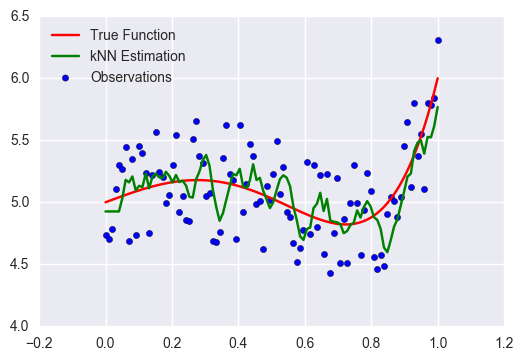

In [6]:
numpy.random.seed(seed=1234)
x = numpy.linspace(0,1,100)
y_p = 5 + x - 5*x**3 + 5*x**5 
n = numpy.random.randint(-100,101,100) * 0.005
y = y_p + n

kNN_plot(y, y_p, x, k=5)

## Common Misconception
Non-parametric statistic *have* parameters

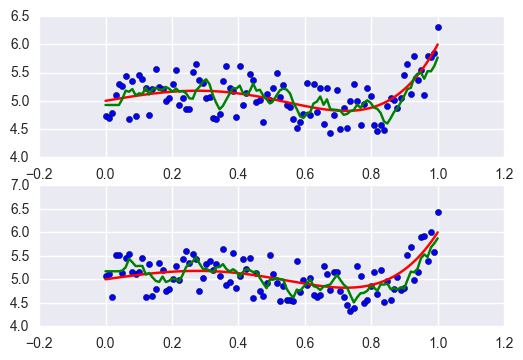

In [7]:
n2 = numpy.random.randint(-100,101,100) * 0.005
y2 = y_p + n2

# k and data are parameters
kNN_plot_mult([y,y2], y_p, x, k=5)